## Machine Learning

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=50
sns.set(style='darkgrid', rc={'axes.facecolor': 'gray'})

ModuleNotFoundError: No module named 'sklearn'

In [13]:
df = pd.read_csv('C:\\Users\\HP\\Documents\\Computer Projects\\Machine Learning\\Datasets\\heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# cp = chest pain
# trestbps = resting blood pressure
# chol = cholesterol
# fbs = fasting blood sugar
# restecg = resting electocardiography
# exang = exercise induced angina
# oldpeak = ST depression induced
# slope = slope of the peak exercise
# ca = number of major vessels
# thal = normal, fixed defect, reversible defect
# target = 1 for disease and 0 for no disease

In [15]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [28]:
females = len(df[df.sex == 0]) * 100/df.shape[0]
males = len(df[df.sex == 1]) * 100/df.shape[0]
print(f'Women: {females:.2f}%, Men: {males:.2f}%')

Women: 30.44%, Men: 69.56%


In [29]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


<function matplotlib.pyplot.show(close=None, block=None)>

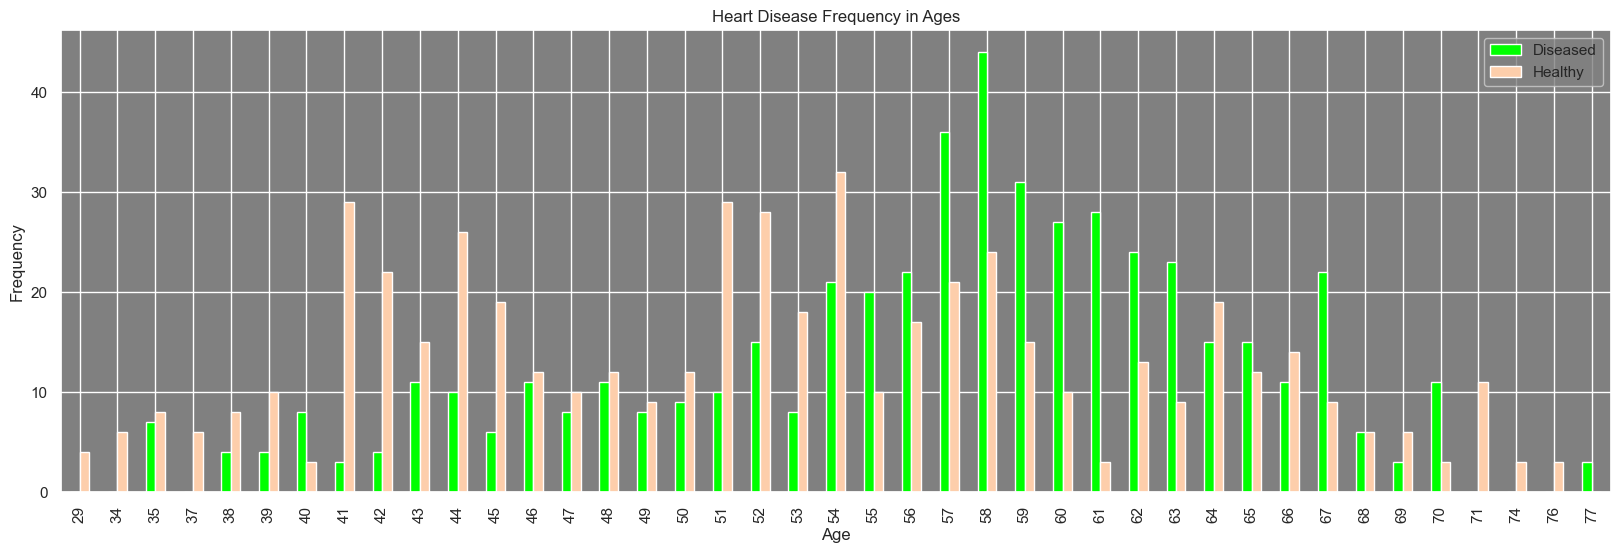

In [57]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 6), color=['#00ff00', '#fdceab'])
plt.title('Heart Disease Frequency in Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Diseased', 'Healthy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

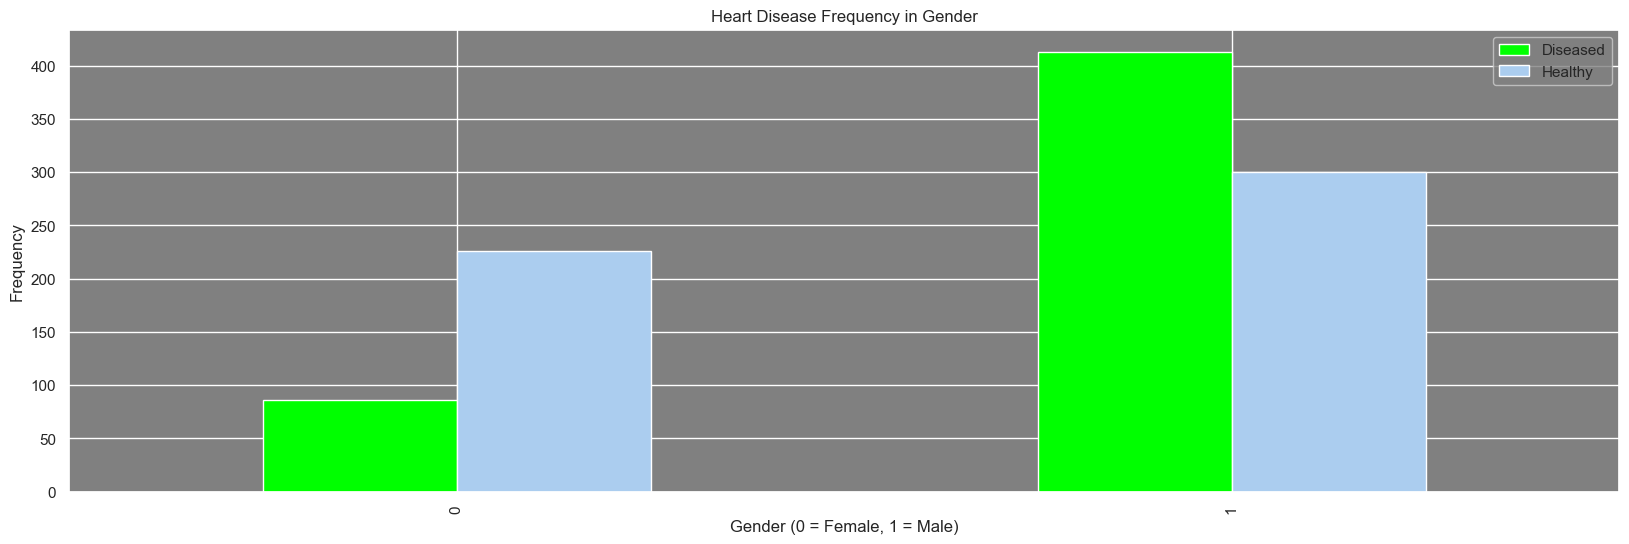

In [54]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(20, 6), color=['#00ff00', '#abcdef'])
plt.title('Heart Disease Frequency in Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(['Diseased', 'Healthy'])
plt.show

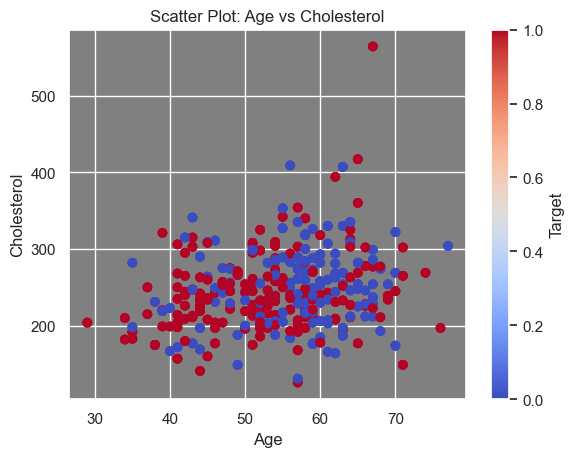

In [65]:
plt.scatter(df['age'], df['chol'], c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [96]:
y = df.target.values
x_data = df.drop(['target'], axis=1)
x_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [97]:
# Normalization
x = (x_data - np.min(x_data)) / np.max(x_data)

In [98]:
# Splitting
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=.3, random_state=0)

In [99]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T